In [1]:
#导入基础包
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
#读取数据
df = pd.read_csv('./data/携程.txt',sep='\t')
df.head(10)

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21
5,1,24645,2016-05-18,2016-05-20,0,NaN,NaN,NaN,1.02,NaN,...,408.0,NaN,NaN,2.880,0.427,NaN,NaN,1,NaN,21
6,0,24647,2016-05-18,2016-05-25,0,NaN,NaN,NaN,1.12,NaN,...,145.0,NaN,NaN,4.427,0.493,NaN,NaN,1,NaN,22
7,0,24650,2016-05-18,2016-05-20,0,3.0,NaN,21.0,1.11,0.79,...,204.0,10475.0,0.53,12.713,1.987,7566.0,1.5,23,1265.0,17
8,0,24652,2016-05-18,2016-05-19,0,13.0,NaN,NaN,1.08,NaN,...,99.0,NaN,0.41,5.393,0.860,15.0,1.0,20,596.0,20
9,0,24653,2016-05-18,2016-06-08,1,2.0,NaN,7.0,1.07,0.86,...,191.0,18873.0,0.52,3.093,0.287,288.0,1.0,31,21926.0,7


In [3]:
#查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   label                             689945 non-null  int64  
 1   sampleid                          689945 non-null  int64  
 2   d                                 689945 non-null  object 
 3   arrival                           689945 non-null  object 
 4   iforderpv_24h                     689945 non-null  int64  
 5   decisionhabit_user                385450 non-null  float64
 6   historyvisit_7ordernum            82915 non-null   float64
 7   historyvisit_totalordernum        386525 non-null  float64
 8   hotelcr                           689148 non-null  float64
 9   ordercanceledprecent              447831 non-null  float64
 10  landhalfhours                     661312 non-null  float64
 11  ordercanncelednum                 447831 non-null  f

添加新列：提前预订 = 入住时间-访问时间,入住时间和访问时间数据格式为’object，需转换成日期型格式

In [4]:
# 转为日期型格式
df['arrival']=pd.to_datetime(df['arrival'])
df['d']=pd.to_datetime(df['d'])
# 相减得到“提前预定天数”列
df['day_advanced']=(df['arrival']-df['d']).dt.days
# 删除原有列
df=df.drop(['d','arrival'],axis=1)
df.head()

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,day_advanced
0,0,24636,0,NaN,NaN,NaN,1.04,NaN,22.0,NaN,...,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12,0
1,1,24637,0,NaN,NaN,NaN,1.06,NaN,0.0,NaN,...,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14,0
2,0,24641,0,NaN,NaN,NaN,1.05,NaN,3.0,NaN,...,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19,1
3,0,24642,0,NaN,NaN,NaN,1.01,NaN,2.0,NaN,...,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16,0
4,1,24644,0,NaN,NaN,NaN,1.00,NaN,0.0,NaN,...,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21,1


异常值处理

In [5]:
# 查看数值型数据描述统计信息
df.describe()

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,day_advanced
count,689945.000000,6.899450e+05,689945.000000,385450.000000,82915.000000,386525.000000,689148.000000,447831.000000,661312.000000,447831.000000,...,447831.000000,602960.000000,682274.000000,651263.000000,592818.000000,457896.000000,689945.000000,5.929100e+05,689945.000000,689945.000000
mean,0.274452,6.285402e+05,0.193737,5.317048,1.856094,11.710487,1.060996,0.342119,6.086366,154.179369,...,101830.919400,0.368237,10.648278,2.253250,12049.409382,1.137476,153.702414,1.855185e+04,14.462315,3.718222
std,0.446238,4.146815e+05,0.395226,38.524483,2.103862,17.251429,0.045264,0.354210,12.413225,398.456986,...,122784.313864,0.219945,15.696682,3.538453,25601.374138,0.204789,277.807697,2.288603e+05,6.301575,6.734140
min,0.000000,2.463600e+04,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007000,0.007000,0.000000,1.000000,0.000000,1.000000e+00,0.000000,0.000000
25%,0.000000,3.123200e+05,0.000000,2.000000,1.000000,2.000000,1.030000,0.000000,0.000000,0.000000,...,14999.000000,0.170000,0.827000,0.127000,551.000000,1.000000,17.000000,4.710000e+02,11.000000,0.000000
50%,0.000000,5.996370e+05,0.000000,3.000000,1.000000,6.000000,1.050000,0.250000,0.000000,2.000000,...,46890.000000,0.400000,3.527000,0.627000,2848.000000,1.050000,62.000000,1.315000e+03,15.000000,0.000000
75%,1.000000,8.874600e+05,0.000000,5.000000,2.000000,14.000000,1.090000,0.570000,4.000000,153.000000,...,138953.000000,0.550000,13.327000,2.747000,10726.000000,1.210000,180.000000,3.141000e+03,20.000000,4.000000
max,1.000000,2.238426e+06,1.000000,3167.000000,106.000000,711.000000,3.180000,1.000000,49.000000,13475.000000,...,527026.000000,0.990000,67.140000,14.507000,194386.000000,11.000000,9956.000000,9.651192e+06,23.000000,30.000000


通过描述统计观察发现，delta_price1、delta_price2、lowestprice、customer_value_profit、ctrip_profits这几个变量最小值为负值，需要对其处理。同时，结合四分位和极值，发现有极大或极小的异常值，如decisionhabit_user、historyvisit_avghotelnum等，较多字段都存在异常值，对所有字段一并进行处理。

In [6]:
for col in ['delta_price1','delta_price2','lowestprice']:
    df.loc[df[col]<0,col]=df[col].median()  # 填充中位数
for col in ['customer_value_profit','ctrip_profits']:
    df.loc[df[col]<0,col]=0  # 填充0
#极值处理
for i in df.columns:
    df.loc[df[i]<np.percentile(df[i],1),i]=np.percentile(df[i],1)
    df.loc[df[i]>np.percentile(df[i],99),i]=np.percentile(df[i],99)

缺失值处理

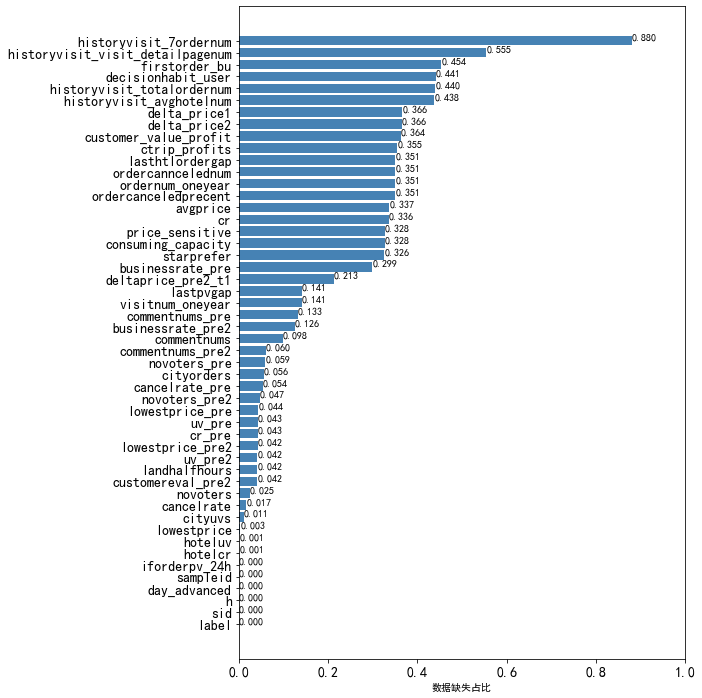

In [7]:
#查看各列缺失情况，并统计
df_count = df.count()
na_count = len(df) - df_count
na_rate = na_count/len(df)
#按values正序排列，不放倒序是为了后边的图形展示排列
a = na_rate.sort_values(ascending=True) 
a1 = pd.DataFrame(a)

#绘图查看缺失情况   
#用来正常展示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
x = df.shape[1]
fig = plt.figure(figsize=(8,12)) #图形大小
plt.barh(range(x),a1[0],color='steelblue',alpha=1) 
plt.tick_params(axis='both',labelsize=14)
plt.xlabel('数据缺失占比') #添加轴标签
columns1 = a1.index.values.tolist() #列名称
plt.yticks(range(x),columns1)
plt.xlim([0,1]) #设置X轴的刻度范围
for x,y in enumerate(a1[0]):
    plt.text(y,x,'%.3f' %y,va='bottom')
plt.show()

缺失值删除
特征值中只有iforderpv_24h、sid、h、day_advanced这四个是不存在缺失的,其他的44个特征都是存在缺失值的,并且大部分的缺失值都挺多的,因此需要对缺失值进行处理
利用dropna(thresh=n)过滤方式，删除行列缺失值大于80%的数据。

In [8]:
# 删除缺失值比例大于80%的行和列
print('删除空值前数据维度是:{}'.format(df.shape))
df.dropna(axis=0,thresh=df.shape[1]*0.2,inplace=True)  
df.dropna(axis=1,thresh=df.shape[0]*0.2,inplace=True)
print('删除空值后数据维度是:{}'.format(df.shape))

删除空值前数据维度是:(689945, 50)
删除空值后数据维度是:(689870, 49)


缺失值补充
趋于正态分布的字段,使用均值填充:businessrate_pre2、cancelrate_pre、businessrate_pre;
偏态分布的字段,使用中位数填充.。

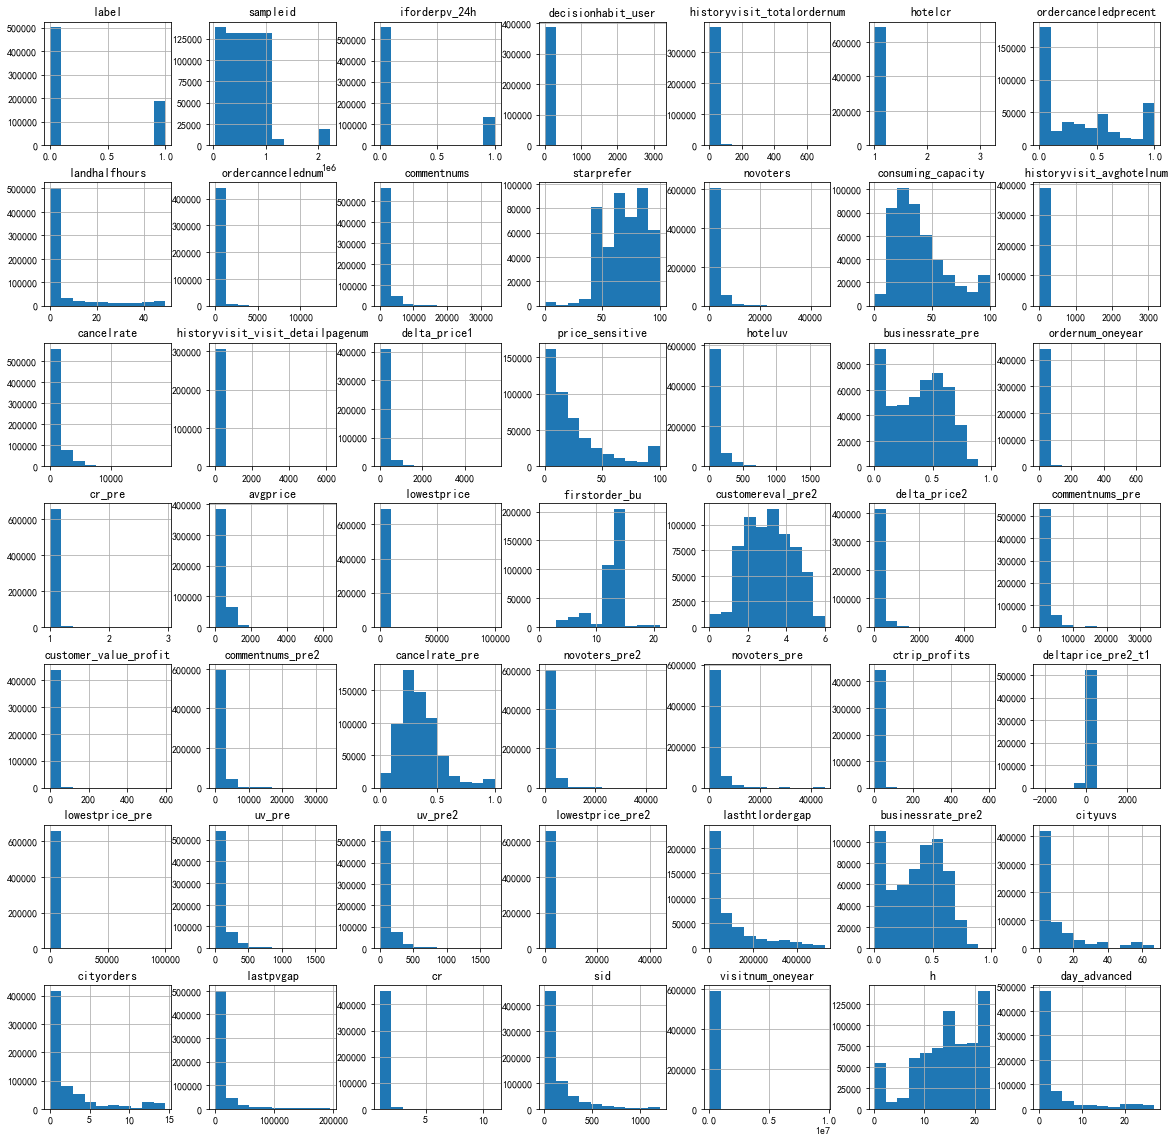

In [9]:
df.hist(figsize=(20,20))
plt.savefig('hist.png')

通过上图看出’businessrate_pre’,‘businessrate_pre2’,‘cancelrate_pre’,'customereval_pre2 '这些字段大体服从正态分布，可以用均值填充；其余字段大都呈右偏态分布，右偏分布就不可以用均值填充了，因为会受到极值的影响，但中位数不太受异常值或者极值的影响，使用中位数填充比较合适。

In [10]:
filter_mean=['businessrate_pre','businessrate_pre2','cancelrate_pre','customereval_pre2 ']
for i in df.columns:
    if i in filter_mean:
        df[i].fillna(df[i].mean(),inplace=True)
    else:
        df[i].fillna(df[i].median(),inplace=True)
df

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,day_advanced
0,0.0,36205.88,0.0,3.0,6.0,1.04,0.25,22.0,2.0,1089.0,...,46890.0,0.290000,12.880,3.147,2848.0,1.05,7.0,1315.0,12.0,0.0
1,1.0,36205.88,0.0,3.0,6.0,1.06,0.25,0.0,2.0,5612.0,...,46890.0,0.530000,17.933,4.913,2848.0,1.05,33.0,1315.0,14.0,0.0
2,0.0,36205.88,0.0,3.0,6.0,1.05,0.25,3.0,2.0,256.0,...,46890.0,0.600000,3.993,0.760,2848.0,1.05,10.0,1315.0,19.0,1.0
3,0.0,36205.88,0.0,3.0,6.0,1.01,0.25,2.0,2.0,514.0,...,46890.0,0.180000,3.220,0.660,2848.0,1.05,8.0,1315.0,16.0,0.0
4,1.0,36205.88,0.0,3.0,6.0,1.00,0.25,0.0,2.0,514.0,...,46890.0,0.368237,0.013,0.627,2848.0,1.05,1.0,1315.0,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689940,1.0,2226892.56,1.0,19.0,6.0,1.06,0.25,1.0,2.0,6798.0,...,46890.0,0.480000,13.573,1.660,1034.0,1.00,5.0,119.0,18.0,2.0
689941,1.0,2226892.56,1.0,10.0,3.0,1.06,0.33,49.0,1.0,2138.0,...,713.0,0.510000,2.880,0.513,179.0,2.00,15.0,1472.0,12.0,0.0
689942,0.0,2226892.56,0.0,3.0,6.0,1.07,0.25,0.0,2.0,1593.0,...,46890.0,0.450000,15.293,2.067,0.0,1.05,8.0,107.0,0.0,2.0
689943,0.0,2226892.56,0.0,3.0,6.0,1.04,0.25,0.0,2.0,124.0,...,46890.0,0.290000,2.467,0.333,2848.0,1.05,4.0,1315.0,0.0,2.0


极值处理
通过上面数据描述分析，数据集中还存在极值，过大或者过小的值会对模型分析造成影响，
盖帽法：某连续变量6西格玛之外的记录用正负3西格玛值替代，一般正负3西格玛包含99%的数据，所以默认凡小于百分之一分位数和大于百分之九十九分位数的值用百分之一分位数和百分之九十九分位数代替，俗称盖帽法

In [11]:
# 盖帽法
for i in df.columns:
    #小于1%分位数的用1%分位数填充
    df.loc[df[i]<np.percentile(df[i],1),i]=np.percentile(df[i],1)   
    # 大于99%分位数的用99%分位数填充
    df.loc[df[i]>np.percentile(df[i],99),i]=np.percentile(df[i],99) 

相关性分析
观察整个数据集可以大体分为两个类别：用户信息和酒店信息。
用户信息，即主体是用户，如consuming_capacity （消费能力指数）、price_sensitive（价格敏感指数）、starprefer（星级偏好）等，这些变量主要描述的是用户信息；
酒店信息，即主体是酒店，如hotelcr （当前酒店历史cr）,commentnums （当前酒店点评数）、novoters （当前酒店评分人数）等，这些变量主要描述的酒店信息。

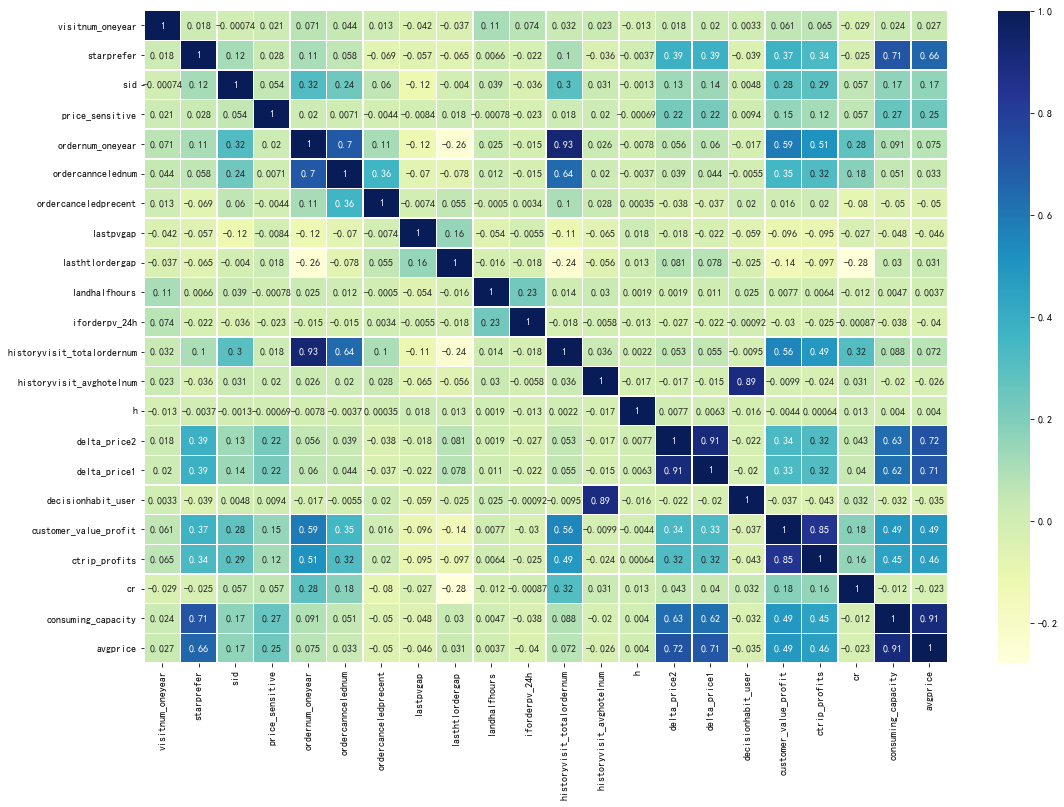

In [12]:
# 用户特征提取
user_features=['visitnum_oneyear','starprefer','sid','price_sensitive','ordernum_oneyear','ordercanncelednum','ordercanceledprecent','lastpvgap',
               'lasthtlordergap','landhalfhours','iforderpv_24h','historyvisit_totalordernum','historyvisit_avghotelnum','h',
               'delta_price2','delta_price1','decisionhabit_user','customer_value_profit','ctrip_profits','cr','consuming_capacity','avgprice']
#生成用户特征的相关性矩阵
user_corr=df[user_features].corr()

#绘制用户特征的相关性矩阵热度图
fig,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(user_corr, 
            xticklabels=True,
            yticklabels=True, 
            square=False, linewidths=.5, 
            annot=True, cmap="YlGnBu")
plt.savefig('./用户特征的相关性分析.jpg',dpi=400, bbox_inches='tight')
plt.show() 


特征降维
在某些限定条件下，降低随机变量（特征）个数，得到一组“不相关”主变量的过程
主成分分析
相关性大于80%的变量进行降维

In [13]:
# 用户价值
c_value=['customer_value_profit','ctrip_profits']   
# 用户消费水平
consume_level=['avgprice','consuming_capacity']   
# 用户偏好价格
price_prefer=['delta_price1','delta_price2']     
# 酒店热度
hotel_hot=['commentnums','novoters']   
# 24小时内浏览次数最多的酒店热度
hotel_hot_pre=['commentnums_pre','novoters_pre']   
# 24小时内浏览酒店的平均热度
hotel_hot_pre2=['commentnums_pre2','novoters_pre2']                 

from sklearn.decomposition import PCA
pca=PCA(n_components=1)
df['c_value']=pca.fit_transform(df[c_value])
df['consume_level']=pca.fit_transform(df[consume_level])
df['price_prefer']=pca.fit_transform(df[price_prefer])
df['hotel_hot']=pca.fit_transform(df[hotel_hot])
df['hotel_hot_pre']=pca.fit_transform(df[hotel_hot_pre])
df['hotel_hot_pre2']=pca.fit_transform(df[hotel_hot_pre2])

df.drop(c_value,axis=1,inplace=True)
df.drop(consume_level,axis=1,inplace=True)
df.drop(price_prefer,axis=1,inplace=True)
df.drop(hotel_hot,axis=1,inplace=True)
df.drop(hotel_hot_pre,axis=1,inplace=True)
df.drop(hotel_hot_pre2,axis=1,inplace=True)
df.drop('historyvisit_totalordernum',axis=1,inplace=True)  ###把重复的一列删了
print('PCA降维后数据维度是：{}'.format(df.shape))

PCA降维后数据维度是：(689870, 42)


特征预处理
标准化处理
数据标准化的目的是：处理不同规模和量纲的数据，使其缩放到相同的数据区间和范围

In [14]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

y = df['label']
x = df.drop('label',axis=1)
scaler = StandardScaler()

X= scaler.fit_transform(x)

建模预测

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
#训练集和测试集的比例为8：2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=420)

逻辑回归模型

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

 # 实例化一个LR模型
lr = LogisticRegression()    
 # 训练模型
lr.fit(X_train,y_train) 
 # 预测1类的概率
y_prob = lr.predict_proba(X_test)[:,1]     
 # 模型对测试集的预测结果
y_pred = lr.predict(X_test)      
 # 获取真阳率、伪阳率、阈值
fpr_lr,tpr_lr,threshold_lr = metrics.roc_curve(y_test,y_prob)   
# AUC得分
auc_lr = metrics.auc(fpr_lr,tpr_lr)  
 # 模型准确率
score_lr = metrics.accuracy_score(y_test,y_pred)                
print('模型准确率为:{0},AUC得分为:{1}'.format(score_lr,auc_lr))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))

模型准确率为:0.7385521909925058,AUC得分为:0.69829800912104
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84    100419
         1.0       0.57      0.16      0.25     37555

    accuracy                           0.74    137974
   macro avg       0.66      0.56      0.55    137974
weighted avg       0.70      0.74      0.68    137974



朴素贝叶斯

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()                                                # 实例化一个朴素贝叶斯模型
gnb.fit(X_train,y_train)                                          # 训练模型
y_prob = gnb.predict_proba(X_test)[:,1]                           # 预测1类的概率
y_pred = gnb.predict(X_test)                                      # 模型对测试集的预测结果
fpr_gnb,tpr_gnb,threshold_gnb = metrics.roc_curve(y_test,y_prob)  # 获取真阳率、伪阳率、阈值
auc_gnb = metrics.auc(fpr_gnb,tpr_gnb)                            # AUC得分
score_gnb = metrics.accuracy_score(y_test,y_pred)                 # 模型准确率


print('模型准确率为:{0},AUC得分为:{1}'.format(score_gnb,auc_gnb))
print('============================================================')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

模型准确率为:0.6349819531216027,AUC得分为:0.6633100335821108
              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72    100419
         1.0       0.39      0.58      0.47     37555

    accuracy                           0.63    137974
   macro avg       0.60      0.62      0.59    137974
weighted avg       0.69      0.63      0.65    137974



支持向量机

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=1,max_iter=100).fit(X_train,y_train)
y_prob = svc.decision_function(X_test)                              # 决策边界距离
y_pred = svc.predict(X_test)                                        # 模型对测试集的预测结果
fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(y_test,y_prob)    # 获取真阳率、伪阳率、阈值
auc_svc = metrics.auc(fpr_svc,tpr_svc)                              # 模型准确率
score_svc = metrics.accuracy_score(y_test,y_pred)
print('模型准确率为:{0},AUC得分为:{1}'.format(score_svc,auc_svc))
print('============================================================')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


模型准确率为:0.5473277574035688,AUC得分为:0.48727298151301235
              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67    100419
         1.0       0.26      0.35      0.30     37555

    accuracy                           0.55    137974
   macro avg       0.49      0.49      0.48    137974
weighted avg       0.59      0.55      0.57    137974



决策树

In [19]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()                              # 建立决策树模型
dtc.fit(X_train,y_train)                                         # 训练模型
y_prob = dtc.predict_proba(X_test)[:,1]                          # 预测1类的概率
y_pred = dtc.predict(X_test)                                     # 模型对测试集的预测结果 
fpr_dtc,tpr_dtc,threshod_dtc= metrics.roc_curve(y_test,y_prob)   # 获取真阳率、伪阳率、阈值
score_dtc = metrics.accuracy_score(y_test,y_pred)                
auc_dtc = metrics.auc(fpr_dtc,tpr_dtc) 
print('模型准确率为:{0},AUC得分为:{1}'.format(score_dtc,auc_dtc))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))

模型准确率为:0.8750779132300288,AUC得分为:0.8483273677353929
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91    100419
         1.0       0.76      0.79      0.77     37555

    accuracy                           0.88    137974
   macro avg       0.84      0.85      0.84    137974
weighted avg       0.88      0.88      0.88    137974



随机森林，随机森林消耗资源较大，运行时间比较久

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()                                     # 建立随机森林分类器
rfc.fit(X_train,y_train)                                           # 训练随机森林模型
y_prob = rfc.predict_proba(X_test)[:,1]                            # 预测1类的概率
y_pred=rfc.predict(X_test)                                         # 模型对测试集的预测结果
fpr_rfc,tpr_rfc,threshold_rfc = metrics.roc_curve(y_test,y_prob)   # 获取真阳率、伪阳率、阈值  
auc_rfc = metrics.auc(fpr_rfc,tpr_rfc)                             # AUC得分
score_rfc = metrics.accuracy_score(y_test,y_pred)                  # 模型准确率
print('模型准确率为:{0},AUC得分为:{1}'.format(score_rfc,auc_rfc))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))

模型准确率为:0.9232681519706611,AUC得分为:0.9739628917821944
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95    100419
         1.0       0.97      0.74      0.84     37555

    accuracy                           0.92    137974
   macro avg       0.94      0.87      0.89    137974
weighted avg       0.93      0.92      0.92    137974



XGBoost,特别占用资源

In [27]:
import xgboost as xgb
# 读入训练数据集和测试集
dtrain=xgb.DMatrix(X_train,y_train)
dtest=xgb.DMatrix(X_test)
# 设置xgboost建模参数
params={'booster':'gbtree','objective': 'binary:logistic','eval_metric': 'auc',
    'max_depth':8,'gamma':0,'lambda':2,'subsample':0.7,'colsample_bytree':0.8,
    'min_child_weight':3,'eta': 0.2,'nthread':8,'silent':1}
# 训练模型
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=500,evals=watchlist)
# 输入预测为正类的概率值
y_prob=bst.predict(dtest)
# 设置阈值为0.5，得到测试集的预测结果
y_pred = (y_prob >= 0.5)*1
# 获取真阳率、伪阳率、阈值
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(y_test,y_prob)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)    # AUC得分
score_xgb = metrics.accuracy_score(y_test,y_pred)    # 模型准确率
print('模型准确率为:{0},AUC得分为:{1}'.format(score_xgb,auc_xgb))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))

[00:37:31] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.69634
[1]	train-auc:0.73766
[2]	train-auc:0.74605
[3]	train-auc:0.74987
[4]	train-auc:0.75530
[5]	train-auc:0.75784
[6]	train-auc:0.76196
[7]	train-auc:0.76672
[8]	train-auc:0.76963
[9]	train-auc:0.77234
[10]	train-auc:0.77530
[11]	train-auc:0.77731
[12]	train-auc:0.78048
[13]	train-auc:0.78285
[14]	train-auc:0.78496
[15]	train-auc:0.78672
[16]	train-auc:0.78942
[17]	train-auc:0.79097
[18]	train-auc:0.79347
[19]	train-auc:0.79552
[20]	train-auc:0.79809
[21]	train-auc:0.80011
[22]	train-auc:0.80197
[23]	train-auc:0.80313
[24]	train-auc:0.80566
[25]	train-auc:0.80719
[26]	train-auc:0.80832
[27]	train-auc:0.81093
[28]	t

[331]	train-auc:0.96586
[332]	train-auc:0.96604
[333]	train-auc:0.96620
[334]	train-auc:0.96645
[335]	train-auc:0.96661
[336]	train-auc:0.96684
[337]	train-auc:0.96706
[338]	train-auc:0.96729
[339]	train-auc:0.96756
[340]	train-auc:0.96766
[341]	train-auc:0.96782
[342]	train-auc:0.96799
[343]	train-auc:0.96809
[344]	train-auc:0.96826
[345]	train-auc:0.96845
[346]	train-auc:0.96862
[347]	train-auc:0.96870
[348]	train-auc:0.96900
[349]	train-auc:0.96909
[350]	train-auc:0.96923
[351]	train-auc:0.96935
[352]	train-auc:0.96949
[353]	train-auc:0.96966
[354]	train-auc:0.96983
[355]	train-auc:0.96993
[356]	train-auc:0.97007
[357]	train-auc:0.97022
[358]	train-auc:0.97040
[359]	train-auc:0.97049
[360]	train-auc:0.97054
[361]	train-auc:0.97065
[362]	train-auc:0.97088
[363]	train-auc:0.97100
[364]	train-auc:0.97109
[365]	train-auc:0.97125
[366]	train-auc:0.97141
[367]	train-auc:0.97151
[368]	train-auc:0.97168
[369]	train-auc:0.97174
[370]	train-auc:0.97182
[371]	train-auc:0.97203
[372]	train-auc:

模型比较

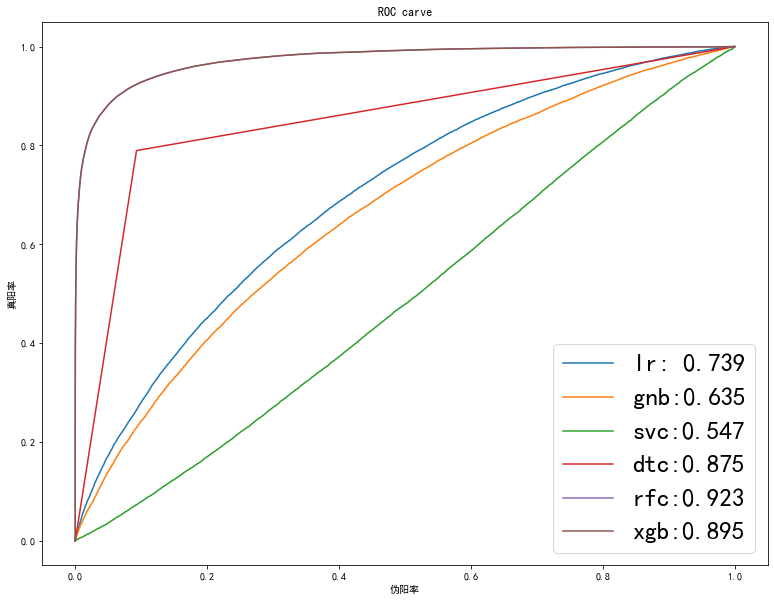

In [28]:
plt.figure(figsize=(13,10))
plt.plot(fpr_lr,tpr_lr,label='lr: {0:.3f}'.format(score_lr))            # 逻辑回归
plt.plot(fpr_gnb,tpr_gnb,label='gnb:{0:.3f}'.format(score_gnb))         # 朴素贝叶斯
plt.plot(fpr_svc,tpr_svc,label='svc:{0:.3f}'.format(score_svc))         # 支持向量机
plt.plot(fpr_dtc,tpr_dtc,label='dtc:{0:.3f}'.format(score_dtc))         # 决策树
plt.plot(fpr_rfc,tpr_rfc,label='rfc:{0:.3f}'.format(score_rfc))         # 随机森林
plt.plot(fpr_rfc,tpr_rfc,label='xgb:{0:.3f}'.format(score_xgb))         #XGBoost
plt.legend(loc='lower right',prop={'size':25})
plt.xlabel('伪阳率')
plt.ylabel('真阳率')
plt.title('ROC carve')
plt.savefig('./模型比较图.jpg',dpi=400, bbox_inches='tight')
plt.show()

使用K-means构建用户画像

RFM模型是衡量客户价值和客户创利能力的重要工具和手段，其有三个指标：最近一次消费时间间隔（Recency），消费频率（Frequency），消费金额（Monetary）。本数据集中三个指标并不都是直接给出，需要进行分析提取。

Recency：选用lasthtlordergap（距离上次下单时长）此字段。
Frequency：选用ordernum_oneyear（用户年订单数）此字段。
Monetary：选用avgprice（平均价格）,consuming_capacity（消费能力指数）这两个字段作为消费金额指标，合并为consume_level。

In [24]:
#字段重名
rfm = df[['lasthtlordergap','ordernum_oneyear','consume_level']]  
rfm.rename(columns={'lasthtlordergap':'recency','ordernum_oneyear':'frequency','consume_level':'monetary'},inplace=True)

#利用MinMaxScaler进行归一化处理
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(rfm)
rfm = pd.DataFrame(scaler.transform(rfm),columns=['recency','frequency','monetary'])

#分箱
rfm['R']=pd.qcut(rfm["recency"], 2)
rfm['F']=pd.qcut(rfm["frequency"], 2)
rfm['M']=pd.qcut(rfm["monetary"], 2)

# 根据分箱情况进行编码，二分类可以直接用标签编码方式
from sklearn.preprocessing import LabelEncoder
rfm['R']=LabelEncoder().fit(rfm['R']).transform(rfm['R'])  
rfm['F']=LabelEncoder().fit(rfm['F']).transform(rfm['F'])
rfm['M']=LabelEncoder().fit(rfm['M']).transform(rfm['M'])

#定义RFM模型，需要特别注意的是，R值代表距离上次消费时间间隔，值越小客户价值越高，与F和M值正好相反。
def get_label(r,f,m):
    if (r==0)&(f==1)&(m==1):
        return '高价值客户'
    if (r==1)&(f==1)&(m==1):
        return '重点保持客户'
    if((r==0)&(f==0)&(m==1)):
        return '重点发展客户'
    if (r==1)&(f==0)&(m==1):
        return '重点挽留客户'
    if (r==0)&(f==1)&(m==0):
        return '一般价值客户'
    if (r==1)&(f==1)&(m==0):
        return '一般保持客户'
    if (r==0)&(f==0)&(m==0):
        return '一般发展客户'
    if (r==1)&(f==0)&(m==0):
        return '潜在客户'

def RFM_convert(df):
    df['Label of Customer']=df.apply(lambda x:get_label(x['R'],x['F'],x['M']),axis=1)
    
    df['R']=np.where(df['R']==0,'高','低')
    df['F']=np.where(df['F']==1,'高','低')
    df['M']=np.where(df['M']==1,'高','低')
    
    return df[['R','F','M','Label of Customer']]

rfm1=RFM_convert(rfm)
rfm1.head(10)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,R,F,M,Label of Customer
0,高,低,高,重点发展客户
1,高,低,低,一般发展客户
2,高,低,低,一般发展客户
3,高,低,低,一般发展客户
4,高,低,低,一般发展客户
5,高,低,低,一般发展客户
6,高,低,低,一般发展客户
7,高,高,高,高价值客户
8,高,低,低,一般发展客户
9,高,高,低,一般价值客户


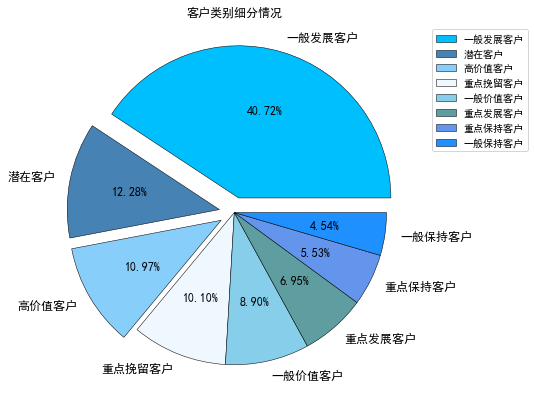

In [25]:
value_counts=rfm1["Label of Customer"].value_counts().values
labels=rfm1["Label of Customer"].value_counts().index
explode=[0.1,0.1,0.1,0,0,0,0,0]
color=['deepskyblue','steelblue','lightskyblue','aliceblue','skyblue','cadetblue','cornflowerblue','dodgerblue']
plt.figure(figsize=(10, 7))

plt.pie(x=value_counts,labels=labels,autopct='%.2f%%',explode=explode,colors=color,wedgeprops={'linewidth':0.5,'edgecolor':'black'},
textprops={'fontsize':12,'color':'black'})
plt.legend(labels,bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.7)
plt.title('客户类别细分情况')
plt.show()

构建用户画像
重要性特征
由于携程数据集的特征较多，我们可以通过XGBoost的plot_importance来辨别哪些是重要性特征，其原理是F score方差分析法。

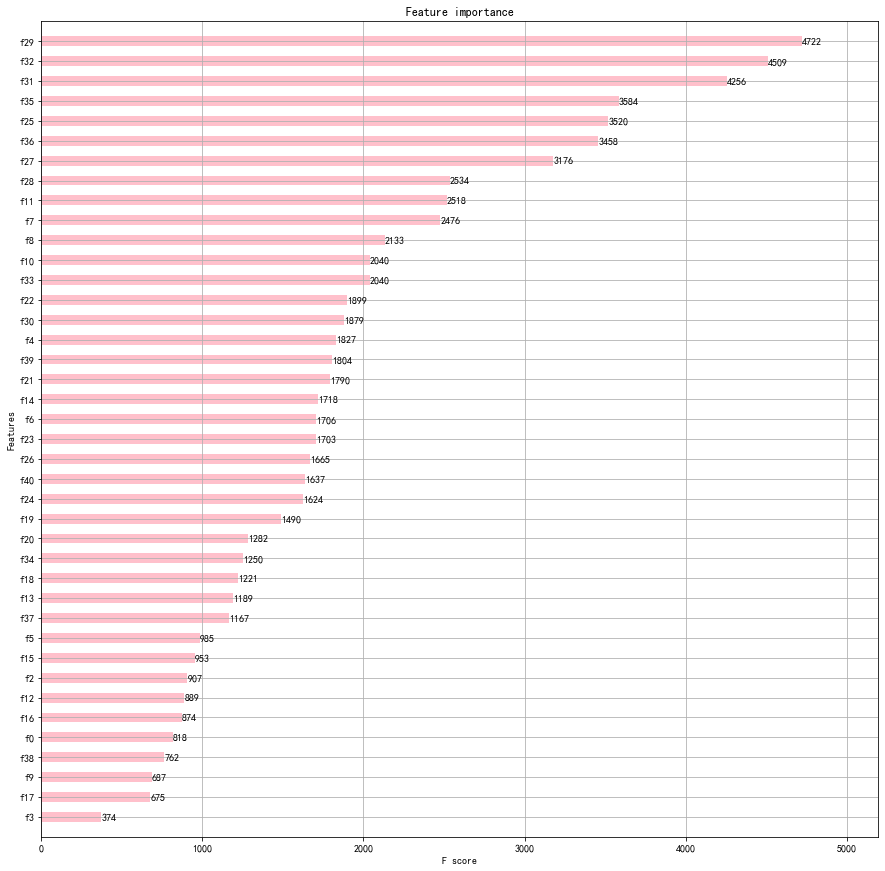

In [32]:
# 导入plot_importance
from xgboost import plot_importance
# 画柱状图
fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(bst, height=0.5, ax=ax, max_num_features=40, color='pink')
plt.savefig('./重要性特征图.jpg', dpi=400, bbox_inches='tight')
plt.show()

从上图可以看到，较为重要的特征为：24小时内是否访问订单填写页（24小时内是否访问订单填写页）、近3个月用户历史日均访问酒店数（historyvisit_avghotelnum）、当前酒店转换率（hotelcr）、当前酒店历史订单取消率（ordercanceledprecent）、星级偏好（starprefer）、用户历史取消率（cancelrate）、 7天内访问酒店详情页数（historyvisit_visit_detailpagenum）、价格敏感指数（price_sensitive）、当前酒店访客量（hoteluv）、浏览最多的酒店商务属性（businessrate_pre）。

聚类分析
K-Means算法是一种基于划分的无监督聚类算法，它以 k 为参数，把 n 个数据对象分成 k 个簇，使簇内具有较高的相似度，而簇间的相似度较低。

In [33]:
# 选取刻画用户的重要指标
user_feature =  ['decisionhabit_user','ordercanncelednum','ordercanceledprecent',
                'consume_level','starprefer','lasthtlordergap','lastpvgap',
                'h','sid','c_value','landhalfhours','price_sensitive',
                'price_prefer','day_advanced','historyvisit_avghotelnum',
                'ordernum_oneyear']
user_attributes = df[user_feature]

# 数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(user_attributes)
user_attributes = scaler.transform(user_attributes)

#K-Means聚类
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=3,random_state=13)                                     # 建立KMean模型
Kmeans.fit(user_attributes)                                                     # 训练模型
k_char = Kmeans.cluster_centers_                                                  # 得到每个分类的质心
personas = pd.DataFrame(k_char.T,index=user_feature,columns=['0类','1类','2类'])  # 用户画像表
personas

,0类,1类,2类
decisionhabit_user,-0.219740,2.998845,-0.185092
ordercanncelednum,-0.218767,-0.061391,0.988974
ordercanceledprecent,-0.043100,0.069963,0.163245
consume_level,-0.286892,-0.196095,1.341449
starprefer,-0.196170,-0.183197,0.936163
lasthtlordergap,0.048487,-0.117142,-0.168846
lastpvgap,0.070479,-0.242030,-0.217801
h,0.004206,-0.044573,-0.001395
sid,-0.188633,0.020705,0.824392
c_value,-0.296708,-0.217219,1.392896


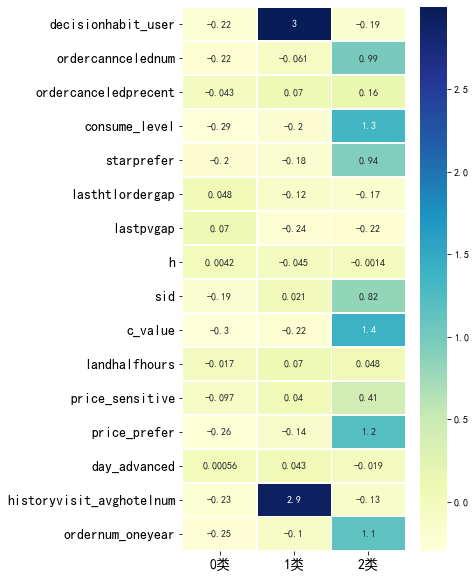

In [36]:
#绘制热力图
fig,ax = plt.subplots(figsize=(5, 10))
sns.heatmap(personas, xticklabels=True,yticklabels=True, square=False,linewidths=.5, annot=True, cmap="YlGnBu")
plt.tick_params(axis='both',labelsize=14)
plt.show() 

其中，2类用户的lasthtlordergap（代表RFM模型中的Recency）为0.048非常小（R越小代表客户价值越高），ordernum_oneyear（代表RFM模型中的Frequency）为1.1比较高，consume_level（代表RFM模型中的Monetary）为1.3也几乎是最高的。很明显，2类客户为我们的“高价值客户”；而0类中几乎都是白格子，无论是客户价值还是消费水平值都是最低的，很明显，这一类我们将其归为“低价值客户”；剩下的1类我们将其称为“中等群体”


<Figure size 648x648 with 0 Axes>

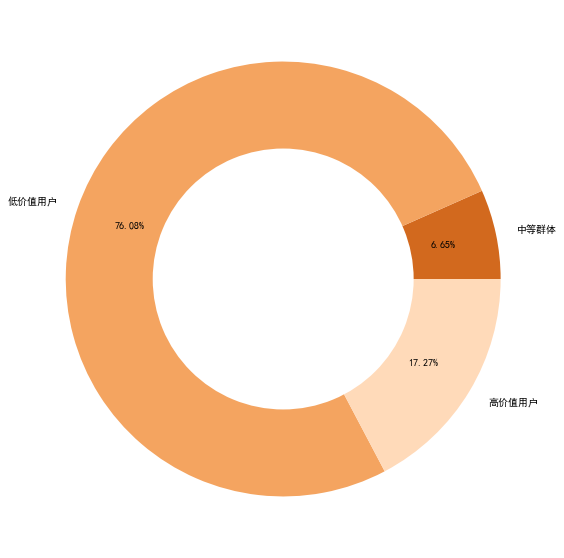

In [42]:
plt.figure(figsize=(9,9))

class_k = list(Kmeans.labels_) # 每个类别的用户个数
percent = [class_k.count(1)/len(user_attributes),
           class_k.count(0)/len(user_attributes),
           class_k.count(2)/len(user_attributes)] # 每个类别用户个数占比

fig, ax = plt.subplots(figsize=(10, 10))
colors = ['chocolate', 'sandybrown', 'peachpuff']
types = ['中等群体', '低价值用户', '高价值用户']
ax.pie(percent, radius=1, autopct='%.2f%%', pctdistance=0.75,
       colors=colors, labels=types)
ax.pie([1], radius=0.6, colors='w')
plt.savefig('./用户画像.jpg', dpi=400, bbox_inches='tight')
plt.show()

#用户画像分析
##从三类客户的占比图得知:
###1、中等价值用户占所有用户人数的6.65%，可结合该群体流失情况分析流失客户因素，进行该群体市场的开拓。
###2、低价值用户是潜在客户群体，占比最高，占总用户人数的76.65%，可对该部分用户实施一些营销策略，进而刺激消费。
###3、高价值用户，能给我们带来较优的收益，可对这类群体实施个性化营销策略。